# Project Description: Cancer mortality rates prediction using socio-economical factors.

# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Maximum coulumn display
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline

# Importing Dataset

In [2]:
df=pd.read_csv("full_dataset.csv")
df

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,RecentTrend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015,Rising,Falling
0,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326,120747,23245,122426,21393,243173,44638,61.5,131,stable,47.3,96,298695,0,0
1,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012,6396,2708,6627,1774,13023,4482,62.7,6,stable,58.3,5,17946,0,0
2,AK,"Fairbanks North Star Borough, Alaska",7752,3523,4229,2090,71068,40605,6957,40210,5322,80815,12279,58.1,36,stable,54.0,31,99631,0,0
3,AK,"Juneau City and Borough, Alaska",2110,1145,965,2110,85746,13739,2433,13582,2213,27321,4646,35.1,9,stable,34.4,8,32756,0,0
4,AK,"Kenai Peninsula Borough, Alaska",5558,2596,2962,2122,63684,22391,6435,21668,5433,44059,11868,64.9,39,stable,50.1,28,58059,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,WY,"Sweetwater County, Wyoming",5058,2177,2881,56037,69022,19891,3318,18600,2683,38491,6001,39.9,14,stable,28.4,9,44626,0,0
2805,WY,"Teton County, Wyoming",1638,1026,612,56039,75325,8948,2558,9555,1192,18503,3750,23.7,5,stable,29.1,5,23125,0,0
2806,WY,"Uinta County, Wyoming",2845,1453,1392,56041,56569,9132,1413,8711,1503,17843,2916,31.7,6,stable,22.1,4,20822,0,0
2807,WY,"Washakie County, Wyoming",1137,489,648,56043,47652,3349,691,3490,703,6839,1394,50,6,stable,38.2,5,8328,0,0


## Data Discription

In [3]:
data_dict = pd.DataFrame(df.columns.values, index=range(len(df.columns)), columns=['Feature'])

data_dict['Definition'] = ['','','Both male and female reported below poverty line (Raw)', 
                           'Males below poverty (Raw)', 'Females below poverty (Raw)', 'State + County FIPS (Raw)',
                           'Med_Income all enthnicities (Raw)', 'Males with health insurance (Raw)',
                           'Males without health insurance (Raw)', 'Females with health insurance (Raw)',
                           'Females without health insurance (Raw)', 'Males and Femaes with health ins. (Raw)',
                           'Males an Females without health ins (Raw)', 'Lung cancer incidence rate (per 100,000)',
                           'Average lung cancer incidence rate (Raw)', 'Recent trend (incidence)', 
                           'Lung cancer mortality rate (per 100,000)', 'Average lung cancer mortalities (Raw)','Population as at 2015','Dummy variable to show recent trend is rising','Dummy variable to show recent trend is falling']


data_dict

,Feature,Definition
0,State,
1,AreaName,
2,All_Poverty,Both male and female reported below poverty li...
3,M_Poverty,Males below poverty (Raw)
4,F_Poverty,Females below poverty (Raw)
5,FIPS,State + County FIPS (Raw)
6,Med_Income,Med_Income all enthnicities (Raw)
7,M_With,Males with health insurance (Raw)
8,M_Without,Males without health insurance (Raw)
9,F_With,Females with health insurance (Raw)


# Data Cleaning

Converting strange values in the incidence rate column to Nan and then replace the Nans with the median value of the column

In [4]:
df['Incidence_Rate'] = pd.to_numeric(df.Incidence_Rate, errors='coerce')
df['Incidence_Rate'] = df.Incidence_Rate.fillna(df.Incidence_Rate.median())
print(sum(df.Incidence_Rate.isnull())) # just to check if we completely filled the Nans

0


Convering all population based features to per capita (this is a form of normalization)

In [5]:
for col in ['All_Poverty', 'M_Poverty', 'F_Poverty', 'M_With',
            'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without']:
       
    df[col + "_PC"] = df[col] / df.POPESTIMATE2015 * 10**5

In [6]:
df

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,RecentTrend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015,Rising,Falling,All_Poverty_PC,M_Poverty_PC,F_Poverty_PC,M_With_PC,M_Without_PC,F_With_PC,F_Without_PC,All_With_PC,All_Without_PC
0,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326,120747,23245,122426,21393,243173,44638,61.5,131,stable,47.3,96,298695,0,0,8006.160130,3581.579872,4424.580257,40424.848089,7782.185842,40986.959942,7162.155376,81411.808032,14944.341218
1,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012,6396,2708,6627,1774,13023,4482,62.7,6,stable,58.3,5,17946,0,0,24317.396634,12253.426948,12063.969687,35640.254096,15089.713585,36927.449014,9885.211189,72567.703109,24974.924774
2,AK,"Fairbanks North Star Borough, Alaska",7752,3523,4229,2090,71068,40605,6957,40210,5322,80815,12279,58.1,36,stable,54.0,31,99631,0,0,7780.710823,3536.048017,4244.662806,40755.387379,6982.766408,40358.924431,5341.710913,81114.311811,12324.477321
3,AK,"Juneau City and Borough, Alaska",2110,1145,965,2110,85746,13739,2433,13582,2213,27321,4646,35.1,9,stable,34.4,8,32756,0,0,6441.567957,3495.542801,2946.025156,41943.460740,7427.646843,41464.159238,6756.014165,83407.619978,14183.661009
4,AK,"Kenai Peninsula Borough, Alaska",5558,2596,2962,2122,63684,22391,6435,21668,5433,44059,11868,64.9,39,stable,50.1,28,58059,0,0,9573.020548,4471.313664,5101.706884,38565.941542,11083.552938,37320.656573,9357.722317,75886.598116,20441.275254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,WY,"Sweetwater County, Wyoming",5058,2177,2881,56037,69022,19891,3318,18600,2683,38491,6001,39.9,14,stable,28.4,9,44626,0,0,11334.199794,4878.322054,6455.877739,44572.670640,7435.127504,41679.738269,6012.190203,86252.408910,13447.317707
2805,WY,"Teton County, Wyoming",1638,1026,612,56039,75325,8948,2558,9555,1192,18503,3750,23.7,5,stable,29.1,5,23125,0,0,7083.243243,4436.756757,2646.486486,38694.054054,11061.621622,41318.918919,5154.594595,80012.972973,16216.216216
2806,WY,"Uinta County, Wyoming",2845,1453,1392,56041,56569,9132,1413,8711,1503,17843,2916,31.7,6,stable,22.1,4,20822,0,0,13663.432908,6978.196139,6685.236769,43857.458457,6786.091634,41835.558544,7218.326770,85693.017001,14004.418404
2807,WY,"Washakie County, Wyoming",1137,489,648,56043,47652,3349,691,3490,703,6839,1394,50.0,6,stable,38.2,5,8328,0,0,13652.737752,5871.757925,7780.979827,40213.736792,8297.310279,41906.820365,8441.402498,82120.557157,16738.712776


# Visual exploration

### Poverty related features

We start we poverty related features

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


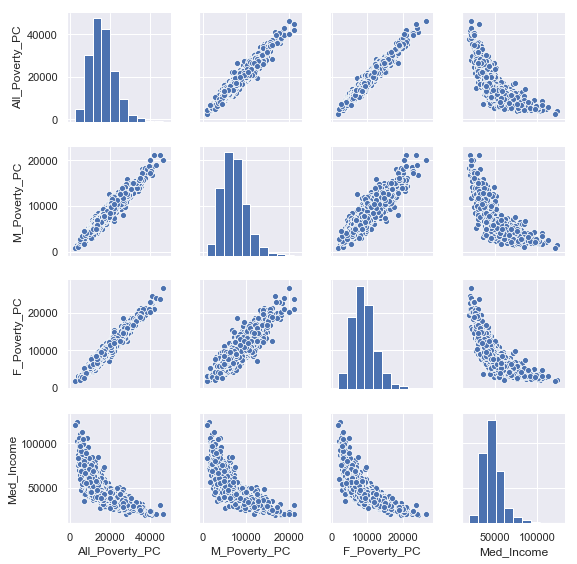

In [7]:
sns.set( context='notebook')
sns.pairplot(df[['All_Poverty_PC', 'M_Poverty_PC', 'F_Poverty_PC', 'Med_Income']], size=2)
plt.show()

In [8]:
def corr_map(cols):
    cm = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1.5)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                     yticklabels=cols, xticklabels=cols,cmap=plt.cm.get_cmap('plasma').reversed())
    plt.show()

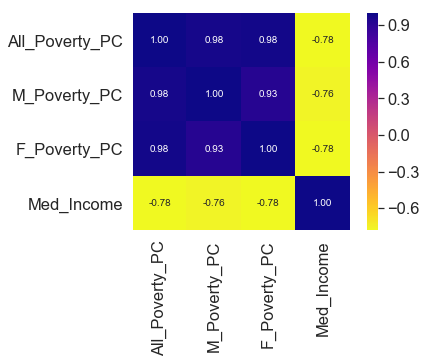

In [9]:
cols = ['All_Poverty_PC', 'M_Poverty_PC', 'F_Poverty_PC', 'Med_Income']
corr_map(cols)

All_Poverty_PC, F_Poverty_PC and M_Poverty_PC are almost perfectly correlated and hence redundant. So i dropped F_Poverty_PC and M_Poverty_PC.

In [10]:
df.drop(['M_Poverty_PC', 'F_Poverty_PC'], axis=1, inplace=True)

### Health insurance related features

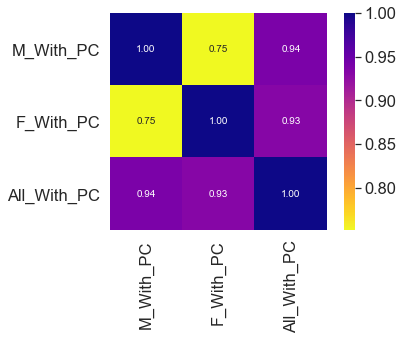

In [11]:
cols = ['M_With_PC', 'F_With_PC','All_With_PC']
corr_map(cols)

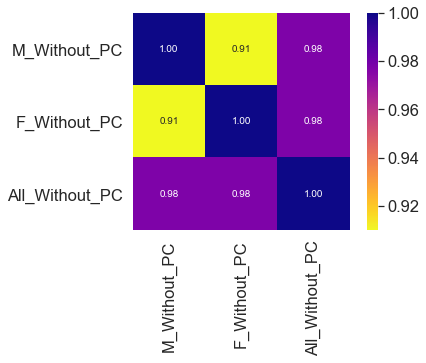

In [12]:
cols = ['M_Without_PC', 'F_Without_PC','All_Without_PC']
corr_map(cols)

From the 2 plots above, it seems Gender specific features are redundant. So we go ahead to drop them

In [13]:
df.drop(['M_With_PC', 'F_With_PC'], axis=1, inplace=True)
df.drop(['M_Without_PC', 'F_Without_PC'], axis=1, inplace=True)

## Correlation of the remaining  features

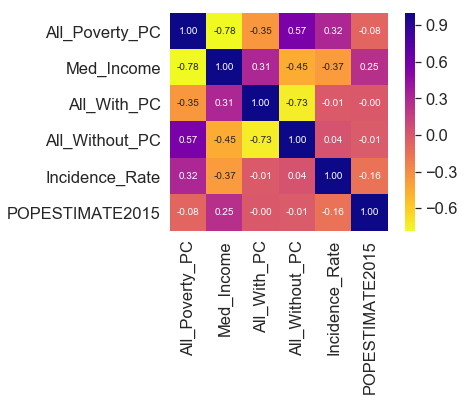

In [14]:
cols = ['All_Poverty_PC', 'Med_Income', 'All_With_PC', 'All_Without_PC',
                'Incidence_Rate', 'POPESTIMATE2015']
corr_map(cols)

The Data seems much reasonable now no redundant feature

# Impact of each feature

In [15]:
#correlation of each feature with the target variable
cols = ['All_Poverty_PC', 'Med_Income', 'All_With_PC',  'All_Without_PC',
        'Incidence_Rate', 'POPESTIMATE2015', 'Falling', 'Rising', 'All_Poverty',
        'All_With', 'All_Without']
df[cols].corrwith(df.Mortality_Rate) 

All_Poverty_PC     0.397879
Med_Income        -0.447110
All_With_PC       -0.095314
All_Without_PC     0.161758
Incidence_Rate     0.842384
POPESTIMATE2015   -0.184482
Falling           -0.068925
Rising            -0.015398
All_Poverty       -0.145649
All_With          -0.187674
All_Without       -0.150935
dtype: float64

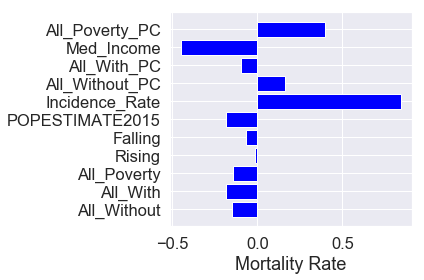

In [16]:
#Correlation Plot
%matplotlib inline
_Cor=df[cols].corrwith(df.Mortality_Rate)
Varriables=[]
y_labels=[]
y_positions=[0,1,2,3,4,5,6,7,8,9,10]
for item in _Cor:
    Varriables.append(item)
for keys in _Cor.keys():
    y_labels.append(keys)

fig, ax = plt.subplots()
ax.barh(y_positions, Varriables, color='blue')
ax.set_yticks(y_positions)
ax.set_yticklabels(y_labels)
ax.set_xlabel('Mortality Rate')
ax.invert_yaxis()
plt.tight_layout()
plt.show()


# Linear Model

In [17]:
X=df[cols]
y=df.Mortality_Rate

Test train split with a test size of 20%

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.20)

# Ordinary least Square

Train
RMSE: 7.09
Mean absolute error: 5.15
R2: 0.74
RMSPE: 15.49 %


Test
RMSE: 7.54
Mean absolute error: 5.46
R2: 0.71
RMSPE: 16.44 %


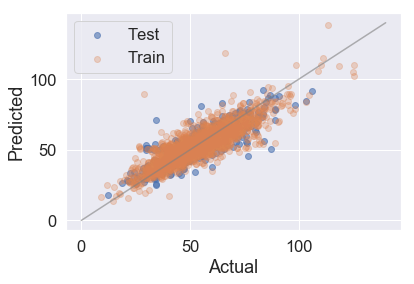

In [19]:
#OLS modelling
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def rmspe(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))*100

    return loss

model = linear_model.LinearRegression()

model.fit(X_train, Y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print("Train")
print("RMSE: %.2f"
          % np.sqrt(mean_squared_error(Y_train, pred_train)))
print("Mean absolute error: %.2f"
      % mean_absolute_error(Y_train, pred_train))
print("R2: %.2f"
  % r2_score(Y_train, pred_train))

print("RMSPE: %.2f"
      % rmspe(Y_train, pred_train),"%")

print("")
print("")
print("Test")
print("RMSE: %.2f"
          % np.sqrt(mean_squared_error(Y_test, pred_test)))
print("Mean absolute error: %.2f"
      % mean_absolute_error(Y_test, pred_test))
print("R2: %.2f"
  % r2_score(Y_test, pred_test))

print("RMSPE: %.2f"
      % rmspe(Y_test, pred_test),"%")
plt.figure()
plt.scatter(Y_test,pred_test,label="Test",alpha=0.6)
plt.scatter(Y_train,pred_train,label="Train",alpha=0.3)
plt.plot([0,140],[0,140],c='grey',alpha=0.6)
plt.ylabel("Predicted")
plt.xlabel("Actual")
#plt.rcParams['axes.facecolor'] = "w"
plt.legend()
plt.show()

# Ridge Regression

In [20]:
#Cross-validation for Ridge regression
from sklearn.model_selection import GridSearchCV
def cv_optimize_ridge(X, y, n_folds=10):
    clf = linear_model.Ridge()
    parameters = {"alpha": [1e-8, 1e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0,10,100,1000,10000]}
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds) ## Set up grid search. Can change scoring parameter.
    gs.fit(X, y) ## Do the grid search
    #print(gs.best_params_)
    return gs.best_estimator_
Ridge=cv_optimize_ridge(X_train,Y_train, n_folds=10)
Ridge

Ridge(alpha=100)

Train
RMSE: 7.09
Mean absolute error: 5.15
R2: 0.74
RMSPE: 15.49 %


Test
RMSE: 7.54
Mean absolute error: 5.46
R2: 0.71
RMSPE: 16.41 %


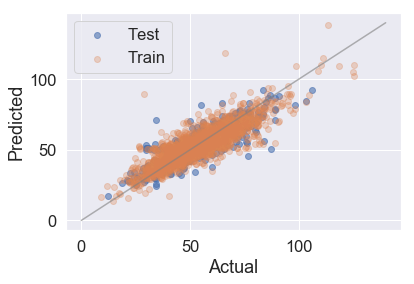

In [21]:
#Ridge regression modelling
Ridge=linear_model.Ridge(alpha=100).fit(X_train,Y_train)

pred_train = Ridge.predict(X_train)
pred_test = Ridge.predict(X_test)

print("Train")
print("RMSE: %.2f"
          % np.sqrt(mean_squared_error(Y_train, pred_train)))
print("Mean absolute error: %.2f"
      % mean_absolute_error(Y_train, pred_train))
print("R2: %.2f"
  % r2_score(Y_train, pred_train))

print("RMSPE: %.2f"
      % rmspe(Y_train, pred_train),"%")

print("")
print("")
print("Test")
print("RMSE: %.2f"
          % np.sqrt(mean_squared_error(Y_test, pred_test)))
print("Mean absolute error: %.2f"
      % mean_absolute_error(Y_test, pred_test))
print("R2: %.2f"
  % r2_score(Y_test, pred_test))

print("RMSPE: %.2f"
      % rmspe(Y_test, pred_test),"%")
plt.figure()
plt.scatter(Y_test,pred_test,label="Test",alpha=0.6)
plt.scatter(Y_train,pred_train,label="Train",alpha=0.3)
plt.plot([0,140],[0,140],c='grey',alpha=0.6)
plt.ylabel("Predicted")
plt.xlabel("Actual")
#plt.rcParams['axes.facecolor'] = "w"
plt.legend()
plt.show()

# Lasso

In [22]:
#Lasso Modelling
def cv_optimize_lasso(X, y, n_folds=10):
    clf = linear_model.Lasso(max_iter=5000)
    parameters = {"alpha": [1e-8, 1e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0,10,100,1000,10000]}
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds,) ## Set up grid search. Can change scoring parameter.
    gs.fit(X, y) ## Do the grid search
    #print(gs.best_params_)
    return gs.best_estimator_
Lasso=cv_optimize_lasso(X_train,Y_train, n_folds=10)
Lasso

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51267.004338294304, tolerance: 40.41360611523245
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50367.32138735137, tolerance: 40.68570740652819
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50707.50843488556, tolerance: 38.7644983288823
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51028.475212

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51863.553447734594, tolerance: 40.524460371909
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50888.23229493906, tolerance: 39.265305244807124
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51136.39127757515, tolerance: 39.22495180860535
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50106.287576

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51139.82807491892, tolerance: 39.22495180860535
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50111.98927908522, tolerance: 39.438833428571435
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51393.72242438581, tolerance: 40.537146791893235
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49541.2502

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52625.59917114994, tolerance: 40.537146791893235
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50776.13456188141, tolerance: 40.10579997528423
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61624.41798404351, tolerance: 40.41360611523245
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60560.84075

Lasso(alpha=0.01, max_iter=5000)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56573.08981236814, tolerance: 44.31289411748999
  positive)


Train
RMSE: 7.09
Mean absolute error: 5.15
R2: 0.74
RMSPE: 15.49 %


Test
RMSE: 7.54
Mean absolute error: 5.46
R2: 0.71
RMSPE: 16.43 %


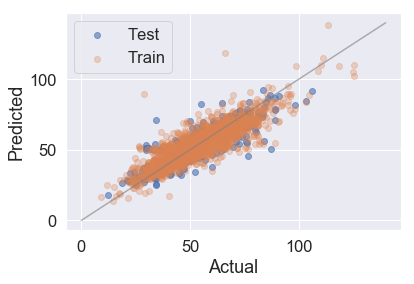

In [23]:
Lasso=linear_model.Lasso(alpha=0.01,max_iter=5000).fit(X_train,Y_train)

pred_train = Lasso.predict(X_train)
pred_test = Lasso.predict(X_test)

print("Train")
print("RMSE: %.2f"
          % np.sqrt(mean_squared_error(Y_train, pred_train)))
print("Mean absolute error: %.2f"
      % mean_absolute_error(Y_train, pred_train))
print("R2: %.2f"
  % r2_score(Y_train, pred_train))

print("RMSPE: %.2f"
      % rmspe(Y_train, pred_train),"%")

print("")
print("")
print("Test")
print("RMSE: %.2f"
          % np.sqrt(mean_squared_error(Y_test, pred_test)))
print("Mean absolute error: %.2f"
      % mean_absolute_error(Y_test, pred_test))
print("R2: %.2f"
  % r2_score(Y_test, pred_test))

print("RMSPE: %.2f"
      % rmspe(Y_test, pred_test),"%")
plt.figure()
plt.scatter(Y_test,pred_test,label="Test",alpha=0.6)
plt.scatter(Y_train,pred_train,label="Train",alpha=0.3)
plt.plot([0,140],[0,140],c='grey',alpha=0.6)
plt.ylabel("Predicted")
plt.xlabel("Actual")
#plt.rcParams['axes.facecolor'] = "w"
plt.legend()
plt.show()

# Model Assessment

### Residual assessment

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


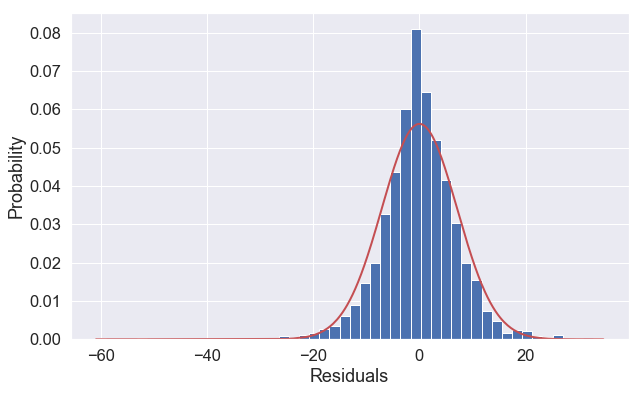

In [49]:
# histogram superimposed by normal curve
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
Xvcols = X_train[cols]#.reset_index(drop=True)
lr = sm.OLS(Y_train, Xvcols, hasconst=True)
result = lr.fit()

plt.figure(figsize=(10,6))

mu = np.mean(result.resid)
sigma = np.std(result.resid)
pdf = stats.norm.pdf(sorted(result.resid), mu, sigma)
plt.hist(result.resid, bins=50, normed=True)
plt.plot(sorted(result.resid), pdf, color='r', linewidth=2)
plt.xlabel("Residuals")
plt.ylabel("Probability")
plt.show()

The distribution of the residuals does not follow a perfect normal distribution (skew=0, excess kurtosis=0). 
There is a small number of outliers to the left indicative of negative skweness, and the distribution has a larger kurtosis than the normal distribution.



# Conclusion

-The error could be improved using non-linear models.

-Real life data rarely, if ever, follow a perfect normal distribution.

-Different method could be used to fill in missing data.
